# Boston House Prediction Using Regularization

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Boston House dataset into pandas dataframe

Attribute Information:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston['data'].shape

(506, 13)

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
df = pd.DataFrame(data = boston['data'], columns= boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Quick EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


No missing value or data type looks normal

In [10]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

To simplify the analysis process, look for null percentages, unique values, and unique examples.

In [11]:
pd.DataFrame(data = bsDesc,
columns = [
    'Features',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,Features,Null,NullPercentage,Unique,Unique Sample
0,CRIM,0,0.0,504,"[0.11027, 0.47547]"
1,ZN,0,0.0,26,"[100.0, 18.0]"
2,INDUS,0,0.0,76,"[2.31, 1.38]"
3,CHAS,0,0.0,2,"[1.0, 0.0]"
4,NOX,0,0.0,81,"[0.538, 0.659]"
5,RM,0,0.0,446,"[6.77, 6.051]"
6,AGE,0,0.0,356,"[33.5, 64.7]"
7,DIS,0,0.0,412,"[4.175, 2.6463]"
8,RAD,0,0.0,9,"[2.0, 5.0]"
9,TAX,0,0.0,66,"[188.0, 352.0]"


### Feature Selection

Create a boxplot to view the target distribution as a basis for determining the type of correlation

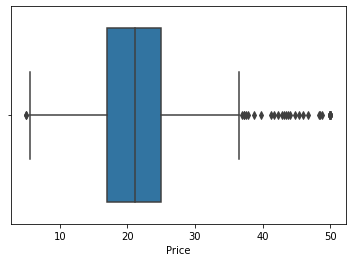

In [12]:
sns.boxplot(df['Price'])
plt.show()

Create a heatmap to drop features that have a low correlation with the target


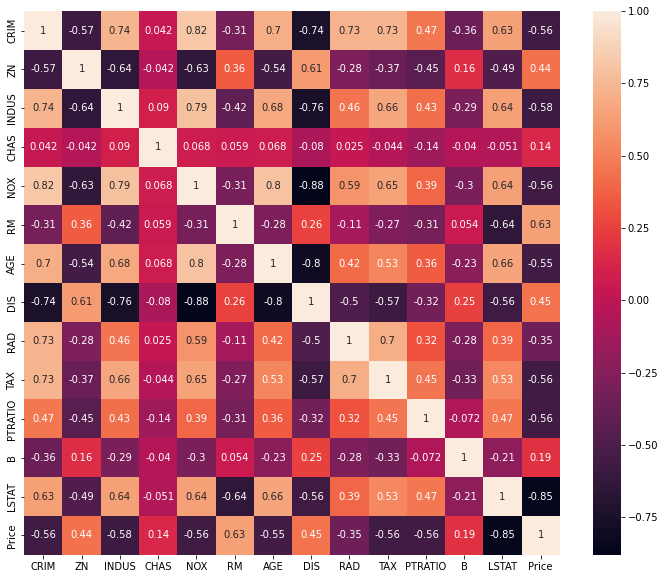

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

Drop features wih correlation value less than 0.5

In [14]:
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace=True)

### Machine Learning Modelling

Create train data and test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns='Price')
y = df['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.15, random_state=42)

Modelling

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Model = LinearRegression()

In [20]:
Model.fit(X_train, y_train)

LinearRegression()

### Evaluation Matrix

Plot actual data and predicted data

In [21]:
pred_train = Model.predict(X_train)

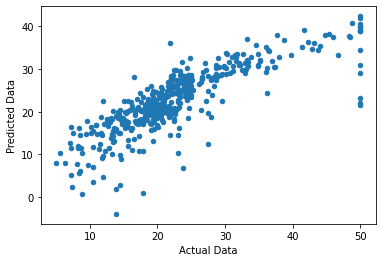

In [22]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [23]:
pred_test = Model.predict(X_test)

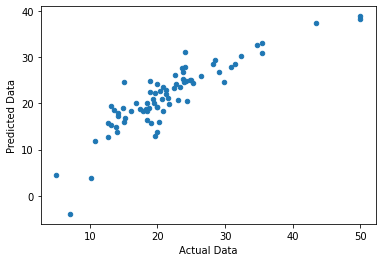

In [24]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [25]:

Training_set = pd.concat([X_train, y_train], axis = 1)

In [26]:
Testing_set = pd.concat([X_test, y_test], axis = 1)

Analyzing Error on Training Set

In [27]:
Training_set['price_pred'] = pred_train

In [28]:
Training_set['Error'] = abs(Training_set['Price'] - Training_set['price_pred'])

Plot to see the error distribution

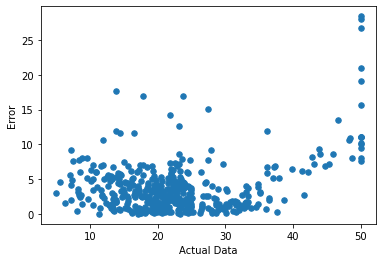

In [29]:
plt.scatter(Training_set['Price'], Training_set['Error'], s=30)
plt.xlabel("Actual Data")
plt.ylabel("Error")
plt.show()

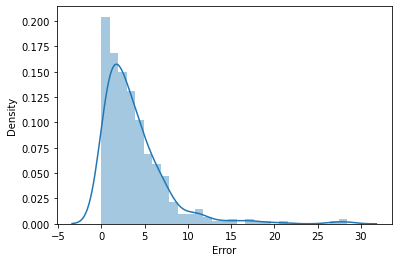

In [30]:
sns.distplot(Training_set['Error'])
plt.show()

In [31]:
Training_set['Error'].mean()

3.766914642244403

In [32]:
Training_set.sort_values('Error', ascending=False).head(10)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,21.583420,28.416580
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,21.988931,28.011069
371,9.23230,18.10,0.631,6.216,100.0,666.0,20.2,9.53,50.0,23.306907,26.693093
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.990210,21.009790
370,6.53876,18.10,0.631,7.016,97.5,666.0,20.2,2.96,50.0,30.869965,19.130035
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-3.933646,17.733646
412,18.81100,18.10,0.597,4.628,100.0,666.0,20.2,34.37,17.9,0.924025,16.975975
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,6.734603,16.965397
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,34.366973,15.633027
365,4.55587,18.10,0.718,3.561,87.9,666.0,20.2,7.12,27.5,12.369844,15.130156


Drop data that has a value of TAX = 666

In [33]:
df = df[df['TAX'] != 666]

Project Limitation : There is no value of 666 in the tax feature

### Feature Engineering

Creating polynomial features

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
Poli = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)


In [36]:
Poli = Poli.fit(X_train)

In [37]:
X_trainPoli = Poli.transform(X_train)
X_testPoli = Poli.transform(X_test)

loading polynomial features into dataframe

In [38]:
df_XtrainPoli = pd.DataFrame(X_trainPoli)
df_XtrainPoli.head()


,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33,1.194976,0.072592,...,213131.5200,11600.12700,6843.519900,49493.8752,29199.01824,1589.217399,722304.00,426124.800,23192.7300,98955.648
1,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81,0.094068,0.014605,...,58401.1904,3832.57812,993.341676,25858.3584,6702.06432,439.822971,109320.96,28334.208,1859.4324,12545.568
2,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08,287.326640,10.651722,...,431973.9270,13101.91190,13672.688260,88051.1940,91887.08760,2786.965720,1333212.12,1391292.648,42198.3656,283593.456
3,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97,5.086684,0.111672,...,378391.4982,10697.14362,12756.742914,77372.0154,92269.01538,2608.448958,1404815.13,1675294.461,47360.6451,342557.667
4,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79,0.777931,0.052417,...,67000.7250,3670.47450,1707.061950,38373.1425,17846.55675,977.680935,215176.50,100074.150,5482.3230,57315.195


In [39]:
df_XtestPoli = pd.DataFrame(X_testPoli)

### Evaluation Matrix

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    r2_tr = r2_score(y_train, y_pred_train)
    mae_tr = mean_absolute_error(y_train, y_pred_train)
    mse_tr = mean_squared_error(y_train, y_pred_train)
    rmse_tr = np.sqrt(mse_tr)
    y_pred_test = Model.predict(X_test)
    r2_ts = r2_score(y_test, y_pred_test)
    mae_ts = mean_absolute_error(y_test, y_pred_test)
    mse_ts = mean_squared_error(y_test, y_pred_test)
    rmse_ts = np.sqrt(mse_ts)
    data_LR = {
    Nama + " Training" : [round(r2_tr,2), round(mae_tr,2), round(mse_tr,2), round(rmse_tr,2)],
    Nama + " Testing"  : [round(r2_ts,2), round(mae_ts,2), round(mse_ts,2), round(rmse_ts,2)],
}

    df_eva = pd.DataFrame(data_LR, index=["R2_Score", "MAE", "MSE", "RMSE"])
    return df_eva

In [42]:
df_eva_base_model = Eva_Matrix_Base_Class(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear Regression')

In [43]:
df_eva_PF = Eva_Matrix_Base_Class(LinearRegression(), df_XtrainPoli, df_XtestPoli, y_train, y_test, 'Polynomial Regression')


In [44]:
pd.concat([df_eva_base_model, df_eva_PF], axis=1).T

,R2_Score,MAE,MSE,RMSE
Linear Regression Training,0.67,3.77,28.63,5.35
Linear Regression Testing,0.77,2.82,14.93,3.86
Polynomial Regression Training,0.91,1.98,7.93,2.82
Polynomial Regression Testing,0.74,2.79,17.28,4.16


## Regularization

we will use polynomial features and non-polynomial features because the results of the previous matrix evaluation are not much different

In [45]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [47]:
df_eva_ridge = Eva_Matrix_Base_Class(Ridge(), X_train, X_test, y_train, y_test, 'Ridge Regularization')

In [49]:
df_eva_ridge_PF = Eva_Matrix_Base_Class(Ridge(), df_XtrainPoli, df_XtestPoli, y_train, y_test, 'Ridge Regularization PF')

In [52]:
df_eva_lasso = Eva_Matrix_Base_Class(Lasso(), X_train, X_test, y_train, y_test, 'Lasso Regularization')

In [53]:
df_eva_lasso_PF = Eva_Matrix_Base_Class(Lasso(), df_XtrainPoli, df_XtestPoli, y_train, y_test, 'Lasso Regularization PF')

In [54]:
df_eva_ElasticNet = Eva_Matrix_Base_Class(ElasticNet(), X_train, X_test, y_train, y_test, 'ElasticNet Regularization')

In [56]:
df_eva_ElasticNet_PF = Eva_Matrix_Base_Class(ElasticNet(), df_XtrainPoli, df_XtestPoli, y_train, y_test, 'ElasticNet Regularization PF')

In [57]:
pd.concat([df_eva_ridge, df_eva_ridge_PF, df_eva_lasso, df_eva_lasso_PF, df_eva_ElasticNet,df_eva_ElasticNet_PF ], axis=1).T

,R2_Score,MAE,MSE,RMSE
Ridge Regularization Training,0.67,3.76,28.67,5.35
Ridge Regularization Testing,0.77,2.81,14.86,3.86
Ridge Regularization PF Training,0.90,2.05,8.38,2.90
Ridge Regularization PF Testing,0.72,2.77,18.14,4.26
Lasso Regularization Training,0.64,4.02,31.68,5.63
Lasso Regularization Testing,0.73,3.05,17.31,4.16
Lasso Regularization PF Training,0.84,2.67,13.60,3.69
Lasso Regularization PF Testing,0.81,2.72,12.47,3.53
ElasticNet Regularization Training,0.63,4.05,32.18,5.67
ElasticNet Regularization Testing,0.73,3.08,17.86,4.23


Conclusion:

According to the evaluation matrix's findings, modeling with polynomial features and lasso regularization has the highest r2 score, MAE, MSE, and RMSE outcomes.